<a href="https://colab.research.google.com/github/CamilleVG/Datathon4Justice/blob/master/Copy_of_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0 Overview

Scikit-learn (formerly scikits.learn, also known as sklearn) is a free software machine learning library for the Python programming language. It was initially developed by Google and was released in 2007. This website https://scikit-learn.org/stable/ gives an overview of the features it has and all the past releases. In general, it is a very powerful, efficient, and robust tool for machine learning and data analysis. 

We will go over the listed features in Sklearn for today's tutorial. 

 * The dataset packages,
 * Preprocessing tools, 
 * Regression, 
 * Support Vector Machines (SVMs),
 * Tree-based classification models, 
 * Dimension reduction method.  

We will focus on the implementation of the algorithms using Sklearn instead of going deep into the theories. For any questions about the theories, one can refer to this book https://www.statlearning.com or discuss with me later. 

# 1 The Datasets Package

`Sklearn` does not only have data analysis tools but also comes with a bunch of easy-to-access datasets. Check https://scikit-learn.org/stable/datasets.html#datasets to see the full list of datasets and the descriptions. Or we can simply do the following and it will return us with the list of datasets as well.   

In [ ]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_class

If we want to load one specific dataset, for example, the wine recognition dataset, we can just do

In [ ]:
from sklearn.datasets import load_wine

For this talk, we will use the California housing data `fetch_california_housing` for linear regression, the forest cover type `fetch_covtype` for classification, and the people's face images `fetch_lfw_people` for dimension reduction. 

# 2 Preprocessing Tools

Common preprocessing techniques in statistical analysis include standardization, normalization, and encoding categorical features.  

## 2.1 Standardization

Standardization normally means to center the mean to 0, scale the variance to 1, and order. This can be done easily by using the `StandardScaler()` function from the `preprocessing` module. 

In [ ]:
from sklearn import preprocessing             # Load the preprocessing module.

In [ ]:
toy_data_1 = np.array([[ 1., -1.,  2.],       # A toy data created for demonstration.
                    [ 2.,  0.,  0.],
                    [ 0.,  1., -1.]])

toy_standardized = preprocessing.StandardScaler().fit_transform(toy_data_1)
print(toy_standardized)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


Here we implicitly have the default value, True, for the two parameters `with_mean` and `with_std`. In this case, we are doing both the centering and scaling, respectively. If we do not want to do either of these, we simply change the value of the corresponding parameter to False to disable it. 

In [ ]:
# This is equivalent as above. 

toy_standardized = preprocessing.StandardScaler(with_mean=True, with_std=True).fit_transform(toy_data_1)
print(toy_standardized)

[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]


Of course we have options for other standardization requirements. For example `MinMaxScaler` transforms data to have it fall into a range (between min and max). `MaxAbsScaler` scales data to a specific range [-1, 1]. Check https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing for more details. 

## 2.2 Normalization

Normalization is the process of scaling individual samples to have unit norm. Similar to standardization, it is also a common requirement before model building. This could be accomplished by using the `normalize` function. Options for different types of norm include `l1`, `l2`, and `max`. Here we use the `l2` norm as an illustration. 

In [ ]:
toy_normalized = preprocessing.normalize(toy_data_1, norm='l2')
print(toy_normalized)

[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


## 2.3 Encoding categorical features

Categorical variables such as gender are sometimes given in data as characters male/female. We have to encode the categories to be, for example, 0/1 so that computers can recognize and better handle them. The conversion (usually to one-hot-coding) can be easily done with `OneHotEncoder` as the following. 

In [ ]:
# Specify the categories for three variables genders, majors, and years. 
genders = ['female', 'male']
majors = ['computer science', 'electrical engineering', 'math', 'others']
years = ['year 1', 'year 2', 'year 3', 'year 4']
enc = preprocessing.OneHotEncoder(categories=[genders, majors, years])

# Create a toy data
toy_data_2 = [['male', 'math', 'year 2'], ['female', 'computer science', 'year 3']]

# One-hot-encode the categorical variables
enc.fit(toy_data_2)

enc.transform([['female', 'electrical engineering', 'year 1']]).toarray()

array([[1., 0., 0., 1., 0., 0., 1., 0., 0., 0.]])

# 3 Regression

## 3.1 Linear Regression

The most basic and common statistical model for analyzing datasets with continuous response values is linear regression. We can use the `LinearRegression` function from the `sklearn.linear_model` module. 

In [ ]:
from sklearn.linear_model import LinearRegression           # Load the package

We also load the `fetch_california_housing` data for demonstration. 

In [ ]:
from sklearn.datasets import fetch_california_housing       # Load the data

We can extract general information about the data by doing 

In [ ]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

For a better preview of the data, we can convert the data into a dataframe 

In [ ]:
features = pd.DataFrame(fetch_california_housing().data)
features.columns = fetch_california_housing().feature_names
features.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
""" Load data and split to training & testing sets """

X, y = fetch_california_housing(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
""" Fit the model """

linear = LinearRegression().fit(X_train, y_train)

r_sq = linear.score(X_train, y_train)
print('Coefficient of determination:', r_sq, "\n")

print('Intercept:', linear.intercept_, "\n")

coeff_df = pd.DataFrame(linear.coef_, features.columns, columns=['Coefficient'])
print("Coefficients: \n", coeff_df)

Coefficient of determination: 0.6125511913966952 

Intercept: -37.023277706063915 

Coefficients: 
             Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


In [ ]:
""" Make predictions """

y_pred = linear.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5332001304957
Mean Squared Error: 0.5558915986952425
Root Mean Squared Error: 0.7455813830127751


This is the most basic ordinary linear regression. Of course, we have options for more advanced linear regression models such as Ridge/Lasso regression, Poisson regression, Bayesian regression, and Generalized Linear Models(GLM), etc. Check https://scikit-learn.org/stable/modules/linear_model.html for the descriptions of these other models. 

## 3.2 Logistic Regression

In most real-world problems, people are more interested in asking "which one" instead of "how many". For example, the algorithm in your email that detects spam messages makes a binary classification. For the rest of talk, we will focus on some of the commonly used machine learning algorithms that make classifications. 

Same as before, we load the dataset. For classification problems we use `fetch_covtype`. We can obtain an overview of the data but we will skip that. The entire dataset has 581,012 rows(entries) and 54 columns(features). 10 features are numerical and 2 are categorical. The categorical variables are one-hot-encoded. The response variable has 7 classes, which indicates 7 different types of forest cover. Since 581,012 entries are too many for a demonstration, we randomly take 10,000 of those. In addition, we also load `LogisticRegression` function to build our logistic regression model. 

In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.linear_model import LogisticRegression

In [ ]:
""" Load and split data into training & testing sets """

X, y = fetch_covtype(return_X_y=True, shuffle=True, random_state=2022)
X, y = X[:10000, :], y[:10000]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = preprocessing.StandardScaler()                   # Standardize the numerical features
X_train[:, :10] = scaler.fit_transform(X_train[:, :10])
X_test[:, :10] = scaler.transform(X_test[:,:10])

Now we can fit the model and pull out the estimated coefficients as below: 

In [ ]:
logistic = LogisticRegression(penalty='l2', C= 1, solver="saga", tol=0.005)
logistic.fit(X_train, y_train)

print("Estimated Intercept", logistic.intercept_[0])
print("Estimated Coefficients", logistic.coef_[0])

Estimated Intercept 3.54894690994296
Estimated Coefficients [ 2.93729388e+00 -2.09022458e-01  7.62418969e-02 -2.36524407e-01
 -2.02269131e-01 -1.28690898e-01 -9.78460313e-02 -3.80877271e-01
  3.58792548e-01 -1.33134983e-01  1.86750004e+00  5.12483838e-01
  2.17833091e-01 -2.12977384e-01 -1.79483883e-02 -4.40056015e-01
 -1.54135401e-01 -8.97493746e-01 -3.18127093e-03 -5.11915979e-02
 -7.49990000e-02 -8.71276410e-02  9.86787960e-01  3.70541559e-01
  5.38311125e-01  4.26213634e-01 -4.65552511e-01 -1.74794246e-03
  0.00000000e+00  2.30892054e-01 -2.73792759e-01 -2.04214515e-01
 -9.50912494e-02  9.60093903e-01  1.11913674e+00  1.23902649e+00
  8.00402910e-01  5.69170386e-01 -5.13238324e-01 -1.75186665e-01
  2.35056348e-01 -3.60453703e-01  5.86874088e-02 -7.33765026e-01
  9.78482612e-01  8.88251320e-02  5.77396373e-01 -1.06076895e+00
 -1.28795574e-01  0.00000000e+00 -7.55045698e-01 -2.08545805e-01
  1.11575080e-01 -2.03428356e-01]


For some of the parameters, think of the definition of Lasso (or Ridge resp.) 
$$\min_{\beta \in R^p} \| y - X \beta \|_2^2 + \lambda \| \beta \|_1,$$ 
or (resp.)
$$\min_{\beta \in R^p} \| y - X \beta \|_2^2 + \lambda \| \beta \|_2^2.$$ 
Lasso has a l1 penalty while Ridge has a l2 penalty. C is inverse of regularization strength; smaller values specify stronger regularization.

How should I know what value to put for each parameter? Cross-validation! For example, we can cross-validate some different values of C. Of course, the powerful `Sklearn` has `cross_val_score` or `cross_validate` so we do not have to write our cross validation code manually. 

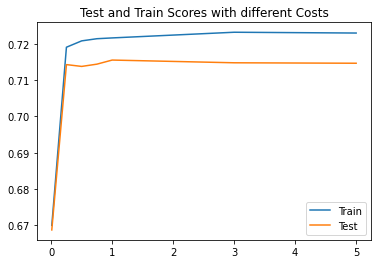

In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
C = [0.01, .25, .5, .75, 1, 3, 5]

test_scores, train_scores = [], []

for c in C: 
    logistic = LogisticRegression(penalty='l1', C= c, solver="saga", tol=0.005)
    logistic.fit(X_train, y_train)
    scores = cross_validate(logistic, X_train, y_train, cv=5, n_jobs=4, return_train_score=True)
    test_scores.append(scores['test_score'].tolist())
    train_scores. append(scores['train_score'].tolist())

test_ave, train_ave = np.array(test_scores).mean(axis=1), np.array(train_scores).mean(axis=1)

plt.plot(C, train_ave, label="Train")
plt.plot(C, test_ave, label="Test")
plt.title("Test and Train Scores with different Costs")
plt.legend()

Finally, we make predictions on our testing set. 

In [ ]:
target_names = ['class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7']
y_pred = logistic.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
0,1,2
1,2,2
2,1,1
3,1,1
4,2,2
5,6,6
6,1,1
7,2,2
8,2,2
9,3,3


For a more complete report, simply use `classification_report`. 

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.70      0.68      0.69       748
     class 2       0.73      0.79      0.76       944
     class 3       0.71      0.82      0.76       136
     class 4       0.90      0.53      0.67        17
     class 5       0.00      0.00      0.00        30
     class 6       0.46      0.25      0.32        53
     class 7       0.73      0.50      0.60        72

    accuracy                           0.71      2000
   macro avg       0.61      0.51      0.54      2000
weighted avg       0.70      0.71      0.70      2000



A quick summary: we have covered the method of fitting regression models, pulling out regression coefficients, making predictions, generating prediction reports, and tuning parameters using cross-validation (all with functions in `Sklearn`)!

## 4 Support Vector Machines (SVMs)

We now start to discuss some machine learning topics. The SVM would be one of these. Briefly recall that a Support Vector Classifier (also called Soft Margin Classifier) is an extension of the Maximal Margin Classifier (also called Hard Margin Classifier) in the sense that we would misclassify a few training observations in order to do a better job in classifying the remaining observations. The SVM is a further generalization of the Support Vector Classifier by enlarging the linear classifier space (or called linear kernal) to accomodate nonlinear classiers (or called nonlinear kernals). Commonly used kernels include `linear`, `polynomial`, and `radial basis` kernels. See pictures [James, et al.] below. 

Maximum Margin Classifier | Support Vector Classifier | Support Vector Machine
---| --- | ---
![alt](Hard.png) | ![alt](Soft.png) | ![alt](Nonlinear.png)

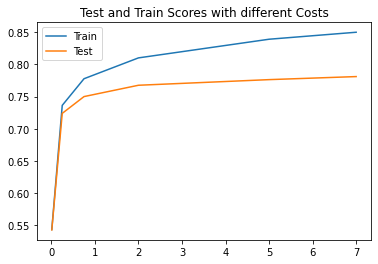

In [ ]:
from sklearn import svm

C = [0.01, .25, .75, 2, 5, 7]

test_scores, train_scores = [], []

for c in C: 
    SVM = svm.SVC(kernel="rbf", C=c, gamma= 'scale', tol = 1e-3)
    SVM.fit(X_train, y_train)
    scores = cross_validate(SVM, X_train, y_train, cv=5, n_jobs=4, return_train_score=True)
    test_scores.append(scores['test_score'].tolist())
    train_scores.append(scores['train_score'].tolist())

test_ave, train_ave = np.array(test_scores).mean(axis=1), np.array(train_scores).mean(axis=1)

plt.plot(C, train_ave, label="Train")
plt.plot(C, test_ave, label="Test")
plt.title("Test and Train Scores with different Costs")
plt.legend()

In [ ]:
SVM = svm.SVC(kernel="rbf", C=5, gamma= 'scale', tol = 1e-5)

SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.78      0.74      0.76       748
     class 2       0.78      0.84      0.81       944
     class 3       0.75      0.80      0.77       136
     class 4       0.91      0.59      0.71        17
     class 5       1.00      0.13      0.24        30
     class 6       0.50      0.45      0.48        53
     class 7       0.85      0.61      0.71        72

    accuracy                           0.77      2000
   macro avg       0.79      0.60      0.64      2000
weighted avg       0.78      0.77      0.77      2000



We can also choose to print out a confusion matrix to check misclassifications. 

In [ ]:
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true=y_test, y_pred = y_pred))

Confusion Matrix
[[556 187   0   0   0   0   5]
 [128 797   9   0   0   7   3]
 [  0  10 109   1   0  16   0]
 [  0   0   6  10   0   1   0]
 [  1  23   2   0   4   0   0]
 [  1   8  20   0   0  24   0]
 [ 28   0   0   0   0   0  44]]


Numbers along the diagnol represents the number of correct preditions for the class. Off-diagnol numbers represent the number of misclassifications. As an example, 128 can be interpreted that there 128 samples from class 2 that are misclassified to class 1. 

# 5 Tree Based Classification Algorithms

Another major field of nonlinear classification is the tree-based methods. Basically, we recursively do binary splittings to grow a tree. There are two types of tree models. The regression trees predict quantitative responses. Commonly used criteria for making splits is the residual sum of squares (RSS). Classification trees make class prediction. Criterias for making splits including Gini index 

$$ G = \sum_{k=1}^K \hat{p}_{mk} (1 - \hat{p}_{mk})$$ 

and cross-entropy

$$ C = -\sum_{k=1}^K \hat{p}_{mk} \log\hat{p}_{mk}, $$ 

where $\hat{p}_{mk}$ represents the proportion of training observations in the $m$th region that are from the $k$th class. Both criteria measure the node purity. 

## 5.1 Decision Tree

Building only one tree is the most basic model in the family of tree based algorithms 

In [ ]:
from sklearn import tree 

max_depths = [5, 10, 15, 20]
min_samples_splits = [10, 100, 200 ,400, 800]
for depth in max_depths: 
    for min_samples_split in min_samples_splits: 
        Decision_tree = tree.DecisionTreeClassifier(max_depth=depth, min_samples_split=min_samples_split, 
                                                    criterion='gini')
        accuracies = cross_val_score(Decision_tree, X_train, y_train, cv=5).mean()
        print("Depth", depth, "Min samples split", min_samples_split)
        print(accuracies)

Depth 5 Min samples split 10
0.7002499999999999
Depth 5 Min samples split 100
0.697
Depth 5 Min samples split 200
0.6975
Depth 5 Min samples split 400
0.6885
Depth 5 Min samples split 800
0.6815
Depth 10 Min samples split 10
0.724125
Depth 10 Min samples split 100
0.703375
Depth 10 Min samples split 200
0.704125
Depth 10 Min samples split 400
0.693375
Depth 10 Min samples split 800
0.682875
Depth 15 Min samples split 10
0.7247499999999999
Depth 15 Min samples split 100
0.7025
Depth 15 Min samples split 200
0.7028749999999999
Depth 15 Min samples split 400
0.692875
Depth 15 Min samples split 800
0.683
Depth 20 Min samples split 10
0.71225
Depth 20 Min samples split 100
0.70075
Depth 20 Min samples split 200
0.702375
Depth 20 Min samples split 400
0.692875
Depth 20 Min samples split 800
0.683


Cross validation implies that using 15 for max_depth and 10 for min_samples_split work the best. All the model building and predction follow the same logic as we have done for the logistic regression and the SVM. 

# 5.2 Random Forest

The random forest improves the decision tree in two aspects. One is, we build muptiple decision trees and take the majority vote. The multiple training sets can be obtained using bootstrap, by taking repeated samples from the same training dataset. This process is called bagging. The bagging procedure lowers the variance. Another improvement, the random forst provides over bagged trees, is that at each split, one only considers a random sample of $m$ features (usually $m = \sqrt{p}$) instead of all the $p$ features. This helps avoid the issue when some of the strong predictors are so dominant in the top split that all the bagged trees look quite similar. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_depths = [15, 20, 25]
min_samples_splits = [5, 10, 15]
num_estimators = [5, 10, 15, 20]

for depth in max_depths: 
    for min_samples_split in min_samples_splits: 
        for n_estimator in num_estimators:
            rf = RandomForestClassifier(n_estimators=n_estimator, min_samples_split = min_samples_split, oob_score= True, 
                                         max_depth=depth, n_jobs = 4, random_state=42, criterion='gini')
            accuracies = cross_val_score(rf, X_train, y_train, cv=5).mean()
            print("Depth", depth, "Min samples split", min_samples_split, "Num of estimators", n_estimator)
            print(accuracies)

Depth 15 Min samples split 5 Num of estimators 5
0.7365
Depth 15 Min samples split 5 Num of estimators 10
0.7529999999999999
Depth 15 Min samples split 5 Num of estimators 15
0.75725
Depth 15 Min samples split 5 Num of estimators 20
0.760375
Depth 15 Min samples split 10 Num of estimators 5
0.728
Depth 15 Min samples split 10 Num of estimators 10
0.7484999999999999
Depth 15 Min samples split 10 Num of estimators 15
0.752875
Depth 15 Min samples split 10 Num of estimators 20
0.7536249999999999
Depth 15 Min samples split 15 Num of estimators 5
0.7333749999999999
Depth 15 Min samples split 15 Num of estimators 10
0.75
Depth 15 Min samples split 15 Num of estimators 15
0.751
Depth 15 Min samples split 15 Num of estimators 20
0.750625
Depth 20 Min samples split 5 Num of estimators 5
0.743875
Depth 20 Min samples split 5 Num of estimators 10
0.764125
Depth 20 Min samples split 5 Num of estimators 15
0.766
Depth 20 Min samples split 5 Num of estimators 20
0.7703749999999999
Depth 20 Min sampl

The random forest function also provides a variable importance measure. It is normally computed as the total reduction of the criterion brought by that feature. See more details here https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html. We first check the top 10 important features. 

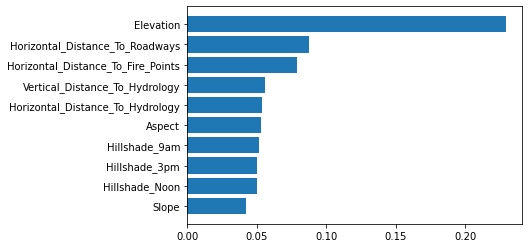

In [ ]:
rf = RandomForestClassifier(n_estimators=20, min_samples_split = 5, oob_score= True, 
                             max_depth=25, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
top10_indices = np.argsort(-importances)[0:10]

fig, ax = plt.subplots()
ax.barh(range(len(top10_indices)), importances[top10_indices][::-1])
ax.set_yticks(range(len(top10_indices)))
_ = ax.set_yticklabels(np.array(fetch_covtype().feature_names)[top10_indices][::-1])

And then the bottom 10 variables that are least important. 

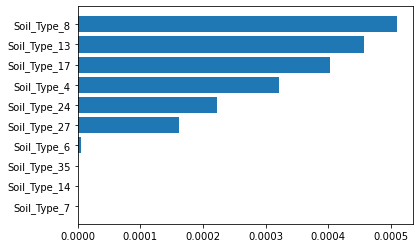

In [ ]:
least10_indices = np.argsort(importances)[0:10]

fig, ax = plt.subplots()
ax.barh(range(len(least10_indices)), importances[least10_indices])
ax.set_yticks(range(len(least10_indices)))
_ = ax.set_yticklabels(np.array(fetch_covtype().feature_names)[least10_indices])

There are other types of tree-based mathods such as Boosting, Adaboost, and Gradient Boosting. Implementations are all similar to the other classification models earlier. We will not discuss them here. 

# 6 Dimension Reduction Method 

One major dimension reduction method is known as the Principle Component Analysis (PCA). The idea is that we would like to find a lower-dimensional representation of the data that captures as much of the information as possible, as shown in the figure [James, et al.]. This is commonly used in an exploratory data analysis. 

<img src="PCA.png" alt="drawing" class="center" width="600"/>

I found this example a very good illustration of how the PCA works. https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html. 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.utils.fixes import loguniform

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Extracting the top 150 eigenfaces from 966 faces
Projecting the input data on the eigenfaces orthonormal basis


Note that we are only using the top 150 principle components instead of all of the 966 observations. SVM is then used to fit our model. The grid search here is similar to the cross-validation as we have used in the previous sections. 

In [ ]:
print("Fitting the classifier to the training set")
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    svm.SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=47344.06224719006, class_weight='balanced', gamma=0.0021643244724541075)


In [ ]:
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)

print(classification_report(y_test, y_pred, target_names=target_names))
plt.tight_layout()
plt.show()

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.59      0.77      0.67        13
     Colin Powell       0.76      0.88      0.82        60
  Donald Rumsfeld       0.83      0.74      0.78        27
    George W Bush       0.93      0.93      0.93       146
Gerhard Schroeder       0.91      0.80      0.85        25
      Hugo Chavez       0.82      0.60      0.69        15
       Tony Blair       0.91      0.81      0.85        36

         accuracy                           0.86       322
        macro avg       0.82      0.79      0.80       322
     weighted avg       0.87      0.86      0.86       322



<Figure size 432x288 with 0 Axes>

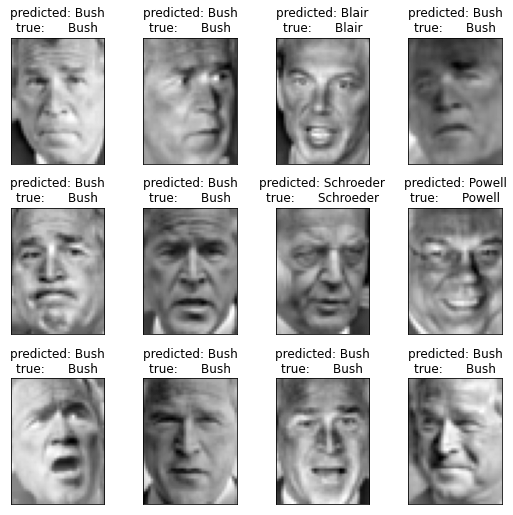

In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

# References

1. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning : with Applications in R. New York :Springer, 2013.

2. https://scikit-learn.org/stable/

3. https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html

4. https://en.wikipedia.org/wiki/Scikit-learn